In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tb_convert import parse_tensorboard

2023-01-12 09:22:01.755984: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
%pwd
%cd ../../ml/Tensorboard/

folder = r'MLP/hparam_test_3'
# folder = r'MLP_WIN/hparam_test'

/home/tomje/ml/Tensorboard


In [3]:
path = os.path.join(folder, r'Results/hparams_table.csv')
results = pd.read_csv(path)
# results.sort_values(by=['epochs','no_nodes']).reset_index(drop=True)

Attempt to load in scalar data to pandas

In [4]:
scalars = ['cv_iter/mse', 'cv_iter/mae', 'cv_iter/r2']

dirs = os.listdir(folder)
a = ['MLP_Win-', 'MLP-', 'LSTM-']
dirs = [x for x in dirs if any(a in x for a in a)]
dirs.sort()

df = {x: parse_tensorboard(os.path.join(folder, x), scalars)
                        for x in dirs}
df = pd.concat(df.values(), keys=df.keys())

In [5]:
results['trial_id'] = df.index.levels[0]
for col in df.columns.values:
    if 'mse' in col:
        scale = 1e6
    elif 'mae' in col:
        scale = 1e3
    else:
        scale = 1
            
    data = [df.loc[trial_id][col].values * scale for trial_id in df.index.levels[0]]
    results[col] = data
results

,batch_size,epochs,no_nodes,loss,dropout,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²,trial_id,cv_iter/mse,cv_iter/mae,cv_iter/r2
0,10.0,2000.0,128.0,mse,0.01,1.194461,8.271709,0.934519,0.378800,8.967527,0.068856,1.070711,5.564044,0.953465,MLP-E-2000-B-10-L[128 128]-D-0.01-20230111-153846,"[1.7773004, 11.365661, 22.428625, 10.047807, 8...","[1.0371528, 1.2004967, 1.5583309, 1.3338681, 1...","[0.9796761, 0.91831034, 0.7461919, 0.91280276,..."
1,10.0,2000.0,128.0,mse,0.10,1.472646,11.924359,0.903539,0.465919,11.493685,0.086877,1.363608,9.975183,0.930019,MLP-E-2000-B-10-L[128 128]-D-0.1-20230111-171109,"[2.613867, 3.4953103, 3.2444432, 20.392942, 24...","[1.3292414, 1.3360533, 1.241685, 1.765426, 1.6...","[0.9771065, 0.97224116, 0.96643955, 0.84368193..."
2,10.0,2000.0,128.0,mse,0.20,2.061800,15.058103,0.879199,0.480195,10.739765,0.071924,2.452772,15.304698,0.878400,MLP-E-2000-B-10-L[128 128]-D-0.2-20230111-184258,"[17.956575, 22.564198, 49.84033, 8.789713, 11....","[2.243093, 2.6860485, 3.6358385, 2.4790797, 2....","[0.88196594, 0.81223625, 0.679734, 0.9355748, ..."
3,10.0,2000.0,128.0,mse,0.50,3.756732,31.509541,0.730923,0.722129,13.284308,0.089663,4.413956,41.743233,0.698391,MLP-E-2000-B-10-L[128 128]-D-0.5-20230111-201529,"[18.419817, 12.944146, 22.10195, 19.545547, 65...","[2.8744814, 3.151164, 3.1603537, 3.4286258, 4....","[0.8391213, 0.8354845, 0.8045676, 0.8241068, 0..."
4,10.0,2000.0,64.0,mse,0.01,1.509327,14.229139,0.884606,0.500514,15.695429,0.111336,1.478796,6.261955,0.957797,MLP-E-2000-B-10-L[64 64]-D-0.01-20230111-095702,"[43.43461, 3.1036603, 5.661694, 6.947399, 11.4...","[1.9443744, 1.2957888, 1.4926583, 1.28776, 1.3...","[0.6401042, 0.9687562, 0.9181647, 0.93663937, ..."
5,10.0,2000.0,64.0,mse,0.10,1.568732,12.452473,0.900184,0.450229,10.872582,0.079425,1.503660,7.726565,0.938028,MLP-E-2000-B-10-L[64 64]-D-0.1-20230111-112127,"[5.5803604, 8.176009, 11.808593, 3.9355674, 2....","[1.0779722, 1.1162593, 1.2949288, 1.1597943, 1...","[0.9508705, 0.90698314, 0.9091585, 0.97058153,..."
6,10.0,2000.0,64.0,mse,0.20,2.224517,15.537705,0.869538,0.637698,11.819173,0.086273,2.300718,16.958109,0.889110,MLP-E-2000-B-10-L[64 64]-D-0.2-20230111-124549,"[17.492264, 7.306294, 18.447931, 3.9942935, 49...","[2.795679, 2.241464, 1.8672247, 1.7483135, 2.8...","[0.8158177, 0.9358164, 0.836607, 0.96689826, 0..."
7,10.0,2000.0,64.0,mse,0.50,3.640548,28.926750,0.745892,0.627568,12.774713,0.080641,3.674560,47.623936,0.702678,MLP-E-2000-B-10-L[64 64]-D-0.5-20230111-141037,"[16.943068, 17.99218, 34.780636, 43.08683, 23....","[2.6449988, 2.7371914, 4.228747, 4.0458493, 3....","[0.8446629, 0.83385324, 0.7052123, 0.65448123,..."
8,20.0,2000.0,128.0,mse,0.01,1.332526,9.581506,0.923610,0.340240,7.984227,0.061285,1.273831,8.954290,0.916804,MLP-E-2000-B-20-L[128 128]-D-0.01-20230111-160607,"[3.3723512, 2.5369444, 3.550365, 15.550604, 15...","[1.2295102, 1.0875189, 0.9893952, 1.7927669, 1...","[0.97439957, 0.978679, 0.971803, 0.89160085, 0..."
9,20.0,2000.0,128.0,mse,0.10,1.591973,11.986512,0.906708,0.397879,9.312756,0.064377,1.333535,10.938689,0.897426,MLP-E-2000-B-20-L[128 128]-D-0.1-20230111-173809,"[9.743998, 21.864418, 1.5667329, 9.626231, 8.2...","[1.4436477, 2.0677106, 0.8593605, 1.411624, 1....","[0.9076532, 0.82334566, 0.9859931, 0.8963521, ..."


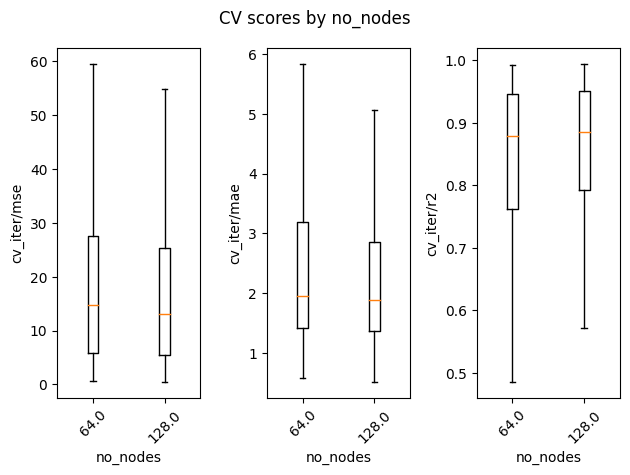

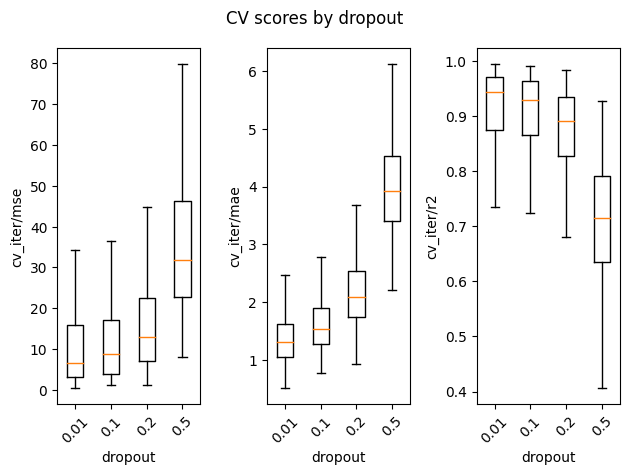

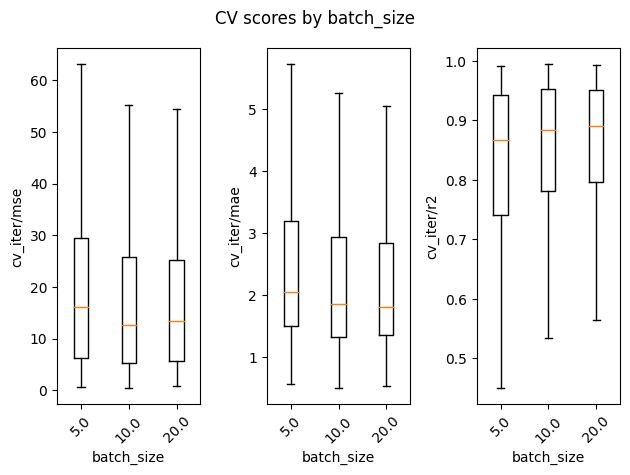

In [6]:
def cv_iter_boxplot(results, hparam, scalars):
    test = [results.groupby(hparam)[scalar].apply(np.hstack) for scalar in scalars]    
    test = pd.concat(test, axis=1)
    fig, axes = plt.subplots(1, 3)
    for i, ax in enumerate(axes):
        ax.boxplot(x=test.iloc[:,i], labels=test.index.values, showfliers=False)
        ax.set_xlabel(hparam)
        ax.set_ylabel(test.columns.values[i])
        ax.tick_params('x', labelrotation=45)
    
    fig.suptitle(f'CV scores by {hparam}')
    plt.tight_layout()

# cv_iter_boxplot(results, 'epochs', scalars)
# cv_iter_boxplot(results, 'seq_len', scalars)
cv_iter_boxplot(results, 'no_nodes', scalars)
# cv_iter_boxplot(results, 'loss', scalars)
cv_iter_boxplot(results, 'dropout', scalars)
cv_iter_boxplot(results, 'batch_size', scalars)

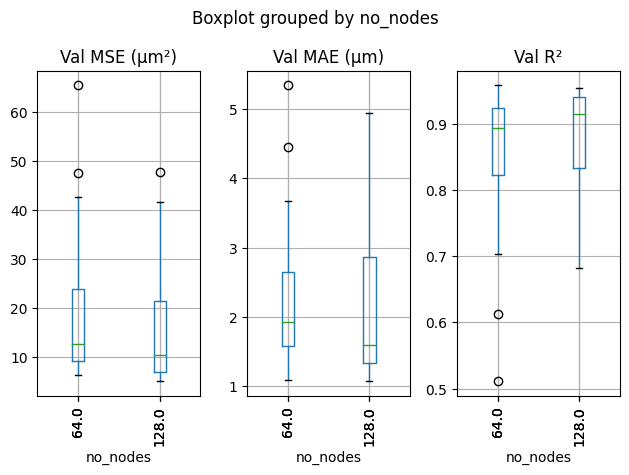

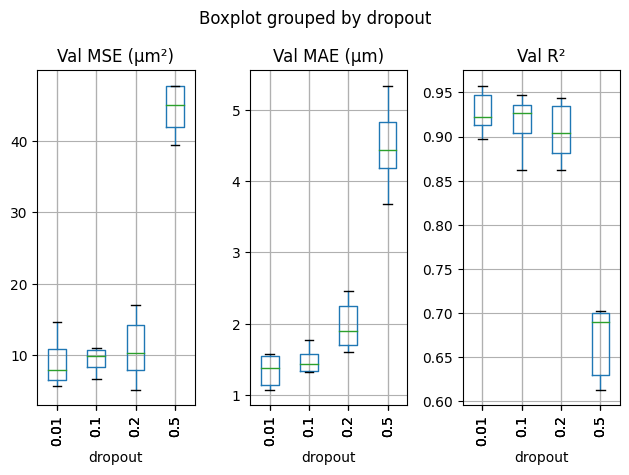

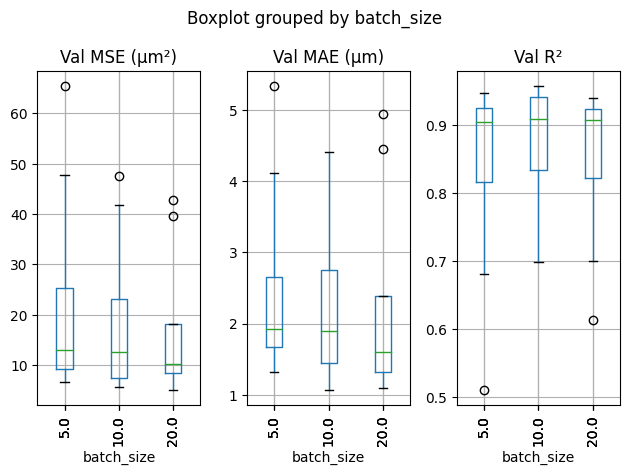

In [13]:
# results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='seq_len', layout=(1,3), rot=90, sharey=False);
# plt.tight_layout()
# results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='epochs', layout=(1,3), rot=90, sharey=False, showfliers=False);
# plt.tight_layout()
results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='no_nodes', layout=(1,3), rot=90, sharey=False);
plt.tight_layout()
# results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='loss', layout=(1,3), rot=90, sharey=False, showfliers=False);
# plt.tight_layout()
results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='dropout', layout=(1,3), rot=90, sharey=False, showfliers=False);
plt.tight_layout()
results.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'], by='batch_size', layout=(1,3), rot=90, sharey=False);
plt.tight_layout()

In [ ]:
results.groupby(['seq_len']).mean(numeric_only=True)

In [ ]:
results.groupby(['epochs']).mean(numeric_only=True)

In [9]:
results.groupby(['no_nodes']).mean(numeric_only=True)

,batch_size,epochs,dropout,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
no_nodes,,,,,,,,,,,,
64.0,11.666667,2000.0,0.2025,2.382389,19.950180,0.837548,0.552185,12.799487,0.086908,2.432355,21.344489,0.833640
128.0,11.666667,2000.0,0.2025,2.196674,17.683489,0.856782,0.541788,12.330015,0.081850,2.264142,17.509003,0.866507


In [ ]:
results.groupby(['loss']).mean(numeric_only=True)

In [10]:
results.groupby(['dropout']).mean(numeric_only=True)

,batch_size,epochs,no_nodes,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
dropout,,,,,,,,,,,,
0.01,11.666667,2000.0,96.0,1.385542,11.281524,0.910195,0.435270,11.404840,0.083830,1.443931,8.963370,0.927274
0.10,11.666667,2000.0,96.0,1.606477,11.979893,0.904402,0.457105,10.502684,0.075320,1.481903,10.440608,0.916238
0.20,11.666667,2000.0,96.0,2.173431,16.524366,0.869979,0.557932,12.335589,0.081494,1.975417,10.823235,0.905516
0.50,11.666667,2000.0,96.0,3.992674,35.481556,0.704085,0.737640,16.015890,0.096872,4.491743,47.479771,0.651266


In [11]:
results.groupby(['batch_size']).mean(numeric_only=True)

,epochs,no_nodes,dropout,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
batch_size,,,,,,,,,,,,
5.0,2000.0,96.0,0.2025,2.479441,21.341214,0.825488,0.596881,13.734873,0.091859,2.511329,22.571226,0.834176
10.0,2000.0,96.0,0.2025,2.178595,17.238722,0.856050,0.532881,11.955898,0.084375,2.282348,18.894715,0.868486
20.0,2000.0,96.0,0.2025,2.210557,17.870568,0.859958,0.511197,12.003482,0.076904,2.251068,16.814296,0.847559
